Loading embeddings and metadata...


Processing JSONL: 100000it [00:43, 2314.21it/s]


FAISS Index constructed with 515998 embeddings.


/home/is1ab/anaconda3/envs/arxcite/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/is1ab/anaconda3/envs/arxcite/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


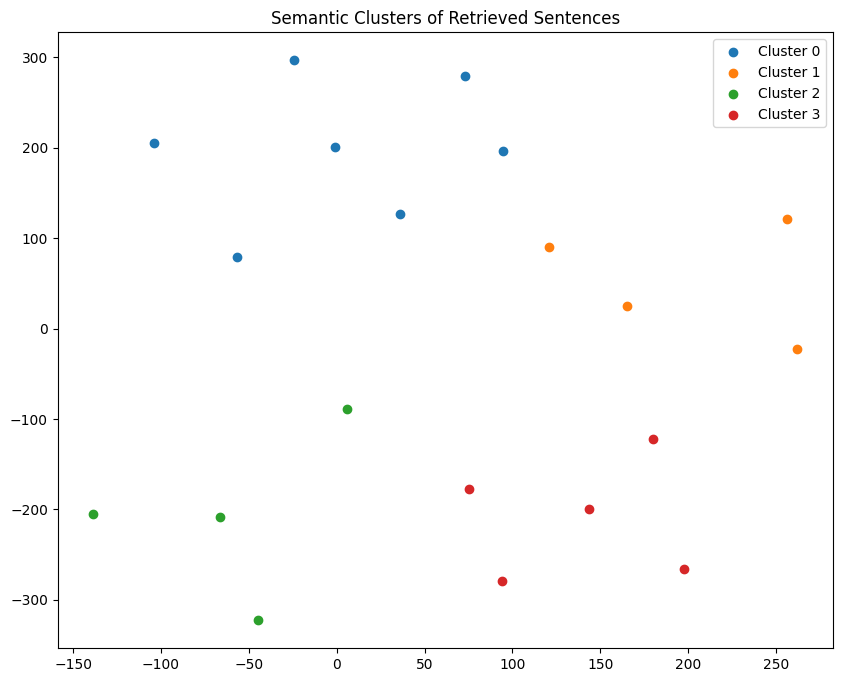


Cluster 0:
- We finally discuss optimization issues, and
relate our work to the literature.
- A wide variety of important optimization problems fall into this framework.
-   Optimization is fundamental in many areas of science, from computer science
and information theory to engineering and statistical physics, as well as to
biology or social sciences.
- The classical difficulty is solved
numerically by the greatest gradient descent method.
- The task is to
maximise the minimum of the objective functions.
- The equations show that optimization is computationally
expensive.
- The
algorithms require only that we solve a sequence of unconstrained optimization
problems, which are shown to be convex.

Cluster 1:
- Optimization problems are inherent in machine learning
algorithms and hence many methods in machine learning were inherited from the
optimization literature.
-   Many problems that arise in machine learning domain deal with nonlinearity
and quite often demand users to obtain glob

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import faiss
import json
from tqdm import tqdm

# Load Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda')

# Load embeddings and metadata
all_embeddings = []
all_sentences = []
metadata_index = []
paper_metadata = []

input_file = 'arxiv-metadata-with-embeddings.json'
print("Loading embeddings and metadata...")

upbound = 100000  # Limit for loading
with open(input_file, 'r') as f:
    for i, line in enumerate(tqdm(f, desc="Processing JSONL")):
        paper = json.loads(line)
        if 'embeddings' in paper and 'sentences' in paper:
            embeddings = np.array(paper['embeddings'], dtype='float32')
            sentences = paper['sentences']
            all_embeddings.extend(embeddings)
            all_sentences.extend(sentences)
            metadata_index.extend([(i, j) for j in range(len(sentences))])
            paper_metadata.append({
                'id': paper.get('id', ''),
                'title': paper.get('title', 'Unknown'),
                'authors': paper.get('authors', []),
                'abstract': paper.get('abstract', ''),
                'doi': paper.get('doi', ''),
                'categories': paper.get('categories', []),
                'journal-ref': paper.get('journal-ref', '')
            })
        if i == upbound:
            break

all_embeddings = np.array(all_embeddings).astype('float32')

# Build FAISS index
dimension = all_embeddings.shape[1]
index_faiss = faiss.IndexFlatIP(dimension)
index_faiss.add(all_embeddings)
print(f"FAISS Index constructed with {index_faiss.ntotal} embeddings.")

# Query and retrieve sentences
query = "Deep learning optimization"
query_embedding = model.encode([query]).astype('float32')
faiss.normalize_L2(query_embedding)  # Normalize query embedding


/home/is1ab/anaconda3/envs/arxcite/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/is1ab/anaconda3/envs/arxcite/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/is1ab/anaconda3/envs/arxcite/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/is1ab/anaconda3/envs/arxcite/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


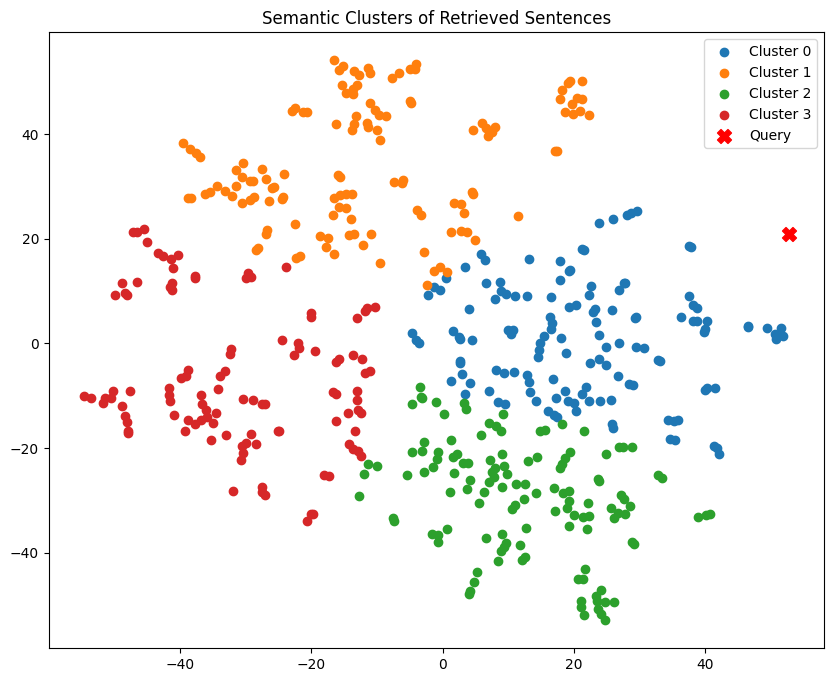


Cluster 0:
- These features are very useful in
practice, but also causing headaches among security specialists, especially in
current hostile network environments.
- Therefore, we introduce a novel Framework for
Network Security which is called SANA.
- It works alongside, and augments,
existing security protocols making deployment practical.
- An attacker can
exploit this by providing service in a targeted way to prevent chosen nodes
from providing service.
- In this paper we are facing these issues and propose the SecMon
system, which simultaneously provides a lightweight security mechanism and
improves quality parameters of the call.
- These codes can be used to ensure security in networks
and safe transmission of identity.
- The security system
then checks the node from outside and the right security components are
provided through a service oriented architecture.
- These nets may be used for defense of a town, city, military
base, battle-front line, road (from terrorists), or any 

In [7]:
# Query and retrieve sentences
query = "A honeypot can help enhance security by detecting, monitoring, and analyzing potential threats and malicious activities."
query_embedding = model.encode([query]).astype('float32')
faiss.normalize_L2(query_embedding)  # Normalize query embedding

k = 500  # Number of sentences to retrieve
distances, indices = index_faiss.search(query_embedding, k)

retrieved_embeddings = np.array([all_embeddings[idx] for idx in indices[0]])
retrieved_sentences = [all_sentences[idx] for idx in indices[0]]

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
reduced_embeddings = tsne.fit_transform(retrieved_embeddings)

# Cluster using K-Means
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(reduced_embeddings)

# Plot the clusters
plt.figure(figsize=(10, 8))
for cluster_id in range(num_clusters):
    cluster_points = reduced_embeddings[clusters == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')

# Highlight query point
query_point_2d = tsne.fit_transform(np.vstack([query_embedding, retrieved_embeddings]))[0]
plt.scatter(query_point_2d[0], query_point_2d[1], color='red', label='Query', marker='X', s=100)

plt.title('Semantic Clusters of Retrieved Sentences')
plt.legend()
plt.show()

# Display retrieved sentences with cluster labels
for cluster_id in range(num_clusters):
    print(f"\nCluster {cluster_id}:")
    for idx, sentence in enumerate(retrieved_sentences):
        if clusters[idx] == cluster_id:
            print(f"- {sentence}")
